# Redes Neuronales Multicapa

Hasta el momento las redes neuronales no son capaces de solucionar problemas no lineales, puesto que una neurona no es más que un hiperplano, y esto nos pertmite tener un clasificador lineal para problemas de regresión y clasificación. Sin embargo; los problemas en la vida real muy pocas veces son lineales, entonces para resolver modelos no lineales necesitamos añadir mas capas a nuestra red neuronal (mapear a una dimensión superior nos permite encontrar un plano que separe las clases, osea tenemos mucha mas flexibilidad para que las neuronas puedan clasificar).

Otra razón para aumentar el número de capas es debido al teorema de Cover, que nos indica que ante un problema de clasificación complejo (no lineal), al ser mapeado de manera no lineal a un espacio de alta dimensión, es más probable de ser linealmente separable que en baja dimensión, siempre y cuando el espacio no sea densamente poblado.

A este tipo de neuronas se las conoce como red densa, FeedForward (debido a que la información que pasa por una neurona no tiene recursividad) Más hallá de los nombres que pueda recibir estas redes, cabe resaltar que nuestra red presenta nodos completamente conectados con los demas nodos.

Es importante poder identificar los nombres que recibe las capas y neuronas. Para esto podemos guiarnos de la imagen a continución.

![Imagen](https://www.scielo.cl/fbpe/img/infotec/v27n5/art16-f1.jpg)

 El vector de caracteristicas $x$, se lo conoce como capa 0; la capa 1 y 2 se las conocen como capas ocultas o profunas; y por último tenemos una capa de salida.

 Para entender la nomenclatura de más adelante es necesario identificar la forma de una red neuronal multicapa de manera general:

 - $L$: N° de capas de la neurona (En este caso $L=3$).
 - $n_l$: N° de neuronas en la capa "l" (por ejemplo en la capa 3, $n_l=2$)
 - $w_{i,j}^{[l]}$: Peso sináptico en la capa "l" de la neurona "i" con la entrada "j" (por ejemplo $w_{1,2}^{[3]}$ representa el peso de la capa 3, neurona 1, entrada 2).
 - $b_i^{[l]}$: Sesgo de la neurona "i" en la capa "l" (por ejemplo $b_3^{[2]}$ es el sesgo de la neurona 3 de la capa 2).

Con esto podemos definir el tamaño de las matrices de los pesos sinápticos para cada capa $l$, $w^{[l]} \in \mathbb{R}^{n_l \times n_{l-1}}$; lo propio para el sesgo, $b^{[l]} \in \mathbb{R}^{n_l}$

No solamente tendremos entradas en nuestra neurona, sino que también salidas para cada capa, entonces:

 - $x_i$ entradas.
 - $\hat{y}_i$ salidas.
 - $a_i^{[l]}$: Salida de la capa "l" de la neurona "i".

En cuanto a las funciones de activación que se debe utilizar:

- $\varphi_i^{[l]}(z)$: Función de activación de la neurona "i" en la capa "l".

Normalmente se coloca una función de activación por cada una de las capas, en las capas ocultas deben ir funciones de activación como ReLU, Tanh, Logistica (colocar una función identidad es como no tener capas ocultas) y; la función de activación en la capa de salida depende de los valores deseados de $y$, y estos son la función Lineal, Logistica y SoftMax.

# Propagración

La propagación implica que la información (entradas) pase de manera secuencial a través de las capas neuroanles. De forma general podemos definirla de siguiente manera:

\begin{align}
a^{[0]} =  x\\
\text{foreach } l \in \left\{1, ..., L\right\}\\
z^{[l]} = w^{[l]} a^{[l-1]} + b^{[l]}\\
a^{[l-]} = \varphi^{[l]}\left(z^{[l]}\right)\\
\hat{y} = a^{[l]}
\end{align}

# Backpropagation

Lo que nos falta es entrenar la red neuronal. Para ello usamos el algoritmo de Backpropagation (gradiente descendente para cada capa).

Sabemos de antemano que para entrenar una red neuronal necesitamos las salidas deseadas $y$ y, con esto calcular el error de salida para modificar la capa final. El problema en esta arquitectura, con redes profundas, es que no contamos salidas deseadas para las capas ocultas. Es por ello que Backpropagation nos ayuda a calcular un error para modificar las capas, para la capa de salida:

$$\delta_i^{[L]} = \left(y_i - a_i^{[L]}\right) \frac{d φ_i^{[L]}}{dz}$$

$$\delta_i^{[L]} = \left(y_i - a_i^{[L]}\right) da^{[l]}$$

Y para las capas ocultas, nos valdremos del peso sinápticos de las capas superiores y el gradiente de la capa final.

Donde $\delta_i^{[L]}$ es el gradiente local de la neurona "i" en la capa "l".

Formalizando podemos calcular el gradiente local de la siguiente forma:

$$\delta_i^{[l]}= \begin{cases}
        \left(y_i - a_i^{[l]} \right) da^{[l]}, & \text{si } l=L \\
    \left[\sum_{j=1}^{n_{l-1}} w_{i,j}^{[l+1]} \delta_{j}^{[l+1]} da^{[l]}\right], & \text{si } 0<l<L
\end{cases}$$

Con la siguiente regla de adaptación:

\begin{align}
w_{i,j}^{[l]} + η \delta_i^{[l]} a_i^{[l-1]} \rightarrow w_{i,j}^{[l]} \\
b_{i}^{[l]} + η \delta_i^{[l]} \rightarrow b_{i}^{[l]} \\
\end{align}



# Programación

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Funciones para la capa de salida------------------------------------------------

def linear(z, derivative=False):
    a = z
    #Calculamos la derivada de la funcion lineal
    if derivative:
        da = np.ones(z.shape) #vector de unos de las misma forma que z
        return a, da
    return a


def logistic(z, derivative=False):
    a = 1 / (1 + np.exp(-z))
    if derivative:
        da = np.ones(z.shape) #Para forzar la funcion de entropia cruzada
        return a, da
    return a

def softmax(z, derivative=False):
    e = np.exp(z - np.max(z, axis=0))
    a = e / np.sum(e, axis=0)
    if derivative:
        da = np.ones(z.shape) #igual que una funcion lineal
        return a, da
    return a


#Funciones para las capas ocultas-----------------------------------------------

def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1+a) * (1-a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0) #Devolvera vector de True o False, multiplicamos por z para obtener los True
    if derivative:
        da = np.array(z >= 0, dtype=np.float32) #vector de 1
        return a, da
    return a

def logistic_hidden(z, derivative=False):
    a = 1 / (1 + np.exp(-z))
    if derivative:
        da = a * (1 - a) #Sera producto elemento a alemento de un dos vectores
        return a, da
    return a

In [39]:
#Creamos la clase

class DenseNetwork:
    def __init__(self, layers_dim, hidden_activation=tanh, #(dimensiones de las capas)
                 output_activation=logistic, learning_rate=0.1):
        #atributos
        self.L = len(layers_dim) - 1 #capas de la red
        self.w = [None] * (self.L + 1) #para evitar la indexacion
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)
        self.lr = learning_rate

        #Inicializamos los pesos sinápticos
        for l in range(1, self.L + 1): #iteramos desde el indice 1
            self.w[l] = -1 + 2*np.random.rand(layers_dim[l], layers_dim[l-1])
            self.b[l] = -1 + 2*np.random.rand(layers_dim[l], 1)
            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation


    def  predict(self, X):
        a = np.asanyarray(X)
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a

    #Entrenamiento en linea
    def fit(self, X, Y, epochs=500):
        P = X.shape[1]
        for _ in range(epochs):
            for p in range(P):
                #inicializamos las activaciones
                a = [None] * (self.L + 1)
                da = [None] * (self.L + 1)
                lg = [None] * (self.L + 1)
                #propagación
                a[0] = X[:,p].reshape(-1,1) #vector columna
                for l in range(1, self.L + 1):
                    z = np.dot(self.w[l], a[l-1]) + self.b[l]
                    a[l], da[l] = self.f[l](z, derivative=True)
                #Backpropagation
                for l in range(self.L, 0, -1): #iteracion a la inversa
                    if l == self.L:
                        lg[l] = (Y[:, p].reshape(-1,1) - a[l]) * da[l]
                    else:
                        lg[l] = np.dot(self.w[l+1].T, lg[l+1]) * da[l]
                #Gradiente descendente
                for l in range(1, self.L + 1):
                    self.w[l] += self.lr * np.dot(lg[l],a[l-1].T)
                    self.b[l] += self.lr * lg[l]

# Test

In [48]:
#CReamos una funcion para graficar
def MLP_binary_classification_df(X,Y,net,title='Gráfica'):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i] == 0:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax,100),
                         np.linspace(ymin,ymax,100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz  = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8, cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.title(title)
    plt.grid()
    plt.show()


In [44]:
#Los datos
X = np.array([[0,0,1,1],
              [0,1,0,1]])
Y = np.array([[1,0,0,1]])

[[0.50519094 0.28314648 0.58117985 0.21404271]]


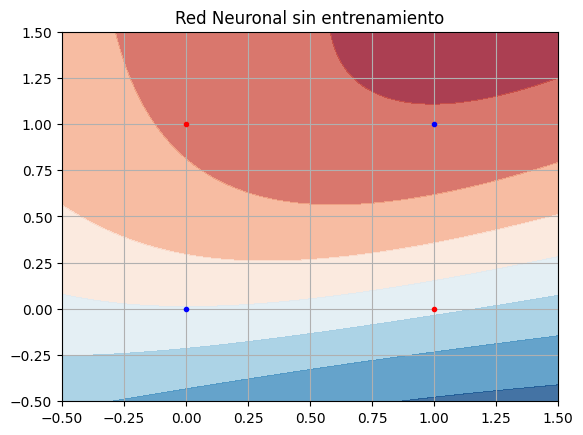

In [50]:
#instanciamos, predecimos y graficamos
net = DenseNetwork((2,20,1))
print(net.predict(X))
MLP_binary_classification_df(X,Y,net, title='Red Neuronal sin entrenamiento')

[[0.99517246 0.00802166 0.00672111 0.99105205]]


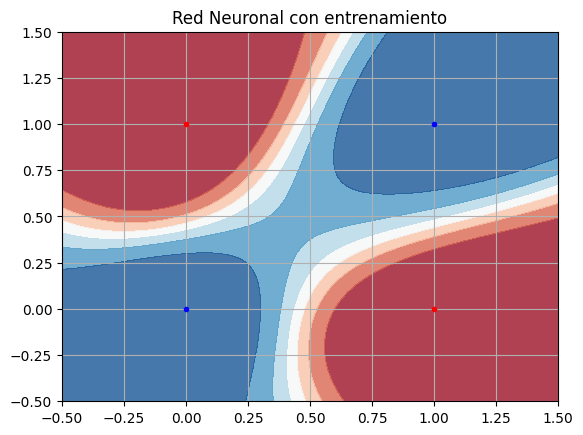

In [51]:
#Entrenamos el modelo con entrenamiento
net.fit(X,Y)
print(net.predict(X))
MLP_binary_classification_df(X,Y,net, title='Red Neuronal con entrenamiento')